In [6]:
import cv2
import matplotlib.pyplot as plt 
import os
import numpy as np 
# from sklearn.svm import SVC
#from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
import torch

In [ ]:
if not os.path.exists("train"):
    os.mkdir("train")
for i in os.listdir():
    if i.endswith(".tif"):
        if not i.endswith("ce.tif"):
            data = cv2.imread(i,3)
            cv2.imwrite("train" + "/"+i.split(".")[0] + ".jpg", data)

In [ ]:
if not os.path.exists("train"):
    os.mkdir("train")
for i in os.listdir():
    if i.endswith("ce.tif"):
        data = cv2.imread(i,2)
        cv2.imwrite("train" + "/"+i.split(".")[0] + ".jpg", data)

In [ ]:
data.shape

In [ ]:
fig, axs = plt.subplots(ncols=3, nrows=2,figsize=(50, 60))
data = cv2.imread("Data1.tif",3)
b,g,r = cv2.split(data)
axs[0,0].imshow(cv2.merge((r,b,g)))
axs[1,0].imshow(cv2.merge((r,g,b)))
axs[0,1].imshow(cv2.merge((g,r,b)))
axs[1,1].imshow(cv2.merge((g,b,r)))
axs[0,2].imshow(cv2.merge((b,r,g)))
axs[1,2].imshow(cv2.merge((b,g,r))) 
plt.show()

In [ ]:
for i in range(5):  
    ref = cv2.imread("Data1_reference.tif",i)
    plt.imshow(ref)
    plt.show()

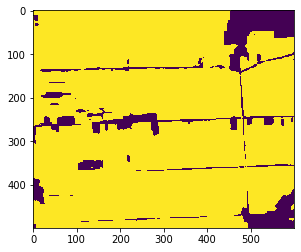

<class 'numpy.ndarray'>
(500, 600)


In [5]:
ref = cv2.imread("pred-test-mask1.tif",2)
plt.imshow(ref)
plt.show()
print(type(ref))
print(ref.shape)

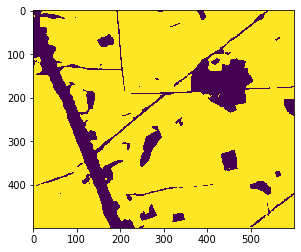

<class 'numpy.ndarray'>
(500, 600)


In [3]:
ref = cv2.imread("pred-test-mask2.tif",2)
plt.imshow(ref)
plt.show()
print(type(ref))
print(ref.shape)

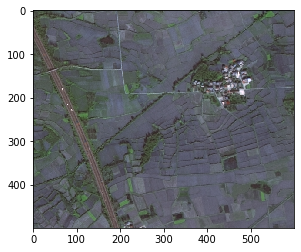

In [4]:
data = cv2.imread("Test2.tif",3)
plt.imshow(data)

In [ ]:
import cv2
import numpy as np 
for i in range(1,9):
    print(i)
    ref = cv2.imread("Data" + str(i) + "_reference.tif",2)
    # print(ref.shape)
    print(np.sum(ref))
    print(np.sum(ref)/(500*600))

In [ ]:
import cv2
from matplotlib import pyplot as plt

def whole_hist(image):
	'''
	绘制整幅图像的直方图
	'''
	plt.hist(image.ravel(), 256, [0, 256]) #numpy的ravel函数功能是将多维数组降为一维数组
	plt.show()

def channel_hist(image):
	'''
	画三通道图像的直方图
	'''
	color = ('b', 'g', 'r')   #这里画笔颜色的值可以为大写或小写或只写首字母或大小写混合
	for i , color in enumerate(color):
		hist = cv2.calcHist([image], [i], None, [256], [0, 256])  #计算直方图
		plt.plot(hist, color)
		plt.xlim([0, 256])
	plt.show()

image = cv2.imread('Data1.tif',3)
cv2.imshow('image', image)
cv2.waitKey(0)
whole_hist(image)
channel_hist(image)

In [ ]:
bottom = cv2.imread("Data1.tif",3)
top = cv2.imread("Data1_reference.tif", 2)
print(bottom.shape)
top = cv2.cvtColor(top, cv2.COLOR_GRAY2BGR)
overlapping = cv2.addWeighted(bottom, 0.5, top, 0.5, 0)
plt.imshow(overlapping)
plt.show()

In [ ]:

clf = make_pipeline( SVC(gamma='auto'))
data = cv2.imread("Data1.tif",3)
#print(data[0,0,:])
data = np.reshape(data, (-1,3))
#print(data[0])
label = cv2.imread("Data1_reference.tif", 2)
label = np.reshape(label, (-1,1))
print(data.shape, label.shape)
print("------------fit SVC------------")
clf.fit(data, label)
print("--------fit SVC finished-------")
data2 = cv2.imread("Data2.tif",3)
#print(data2[0,0,:])
data2 = np.reshape(data, (-1,3))
#print(data2[0])
label2 = cv2.imread("Data2_reference.tif", 2)
label2 = np.reshape(label, (-1,1))
result = clf.predict(data2)
result = np.reshape(result, (-1, 1))
print(np.sum(np.abs(result - label2)) )

In [ ]:
result = clf.predict(data2)
print(np.sum(np.abs(result - label2)) )

In [ ]:
result = np.reshape(result, (-1, 1))
np.sum(np.abs(result - label2))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
data = cv2.imread("Data1.tif",3)
#print(data[0,0,:])
data = np.reshape(data, (-1,3))
#print(data[0])
label = cv2.imread("Data1_reference.tif", 2)
label = np.reshape(label, (-1))
print(data.shape, label.shape)
print("------------fit SVC------------")
clf.fit(data, label)
print("--------fit SVC finished-------")
data2 = cv2.imread("Data2.tif",3)
#print(data2[0,0,:])
data2 = np.reshape(data, (-1,3))
#print(data2[0])
label2 = cv2.imread("Data2_reference.tif", 2)
label2 = np.reshape(label, (-1,1))
result = clf.predict(data2)
result = np.reshape(result, (-1, 1))
print(np.sum(np.abs(result - label2)) )

In [ ]:
import urllib
url, filename = ("https://github.com/mateuszbuda/brain-segmentation-pytorch/raw/master/assets/TCGA_CS_4944.png", "TCGA_CS_4944.png")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [ ]:
import torch
model = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet',
    in_channels=3, out_channels=1, init_features=32, pretrained=True)

In [ ]:
import numpy as np
from PIL import Image
from torchvision import transforms
filename = "dataSet/data100.jpg"
input_image = Image.open(filename)
m, s = np.mean(input_image, axis=(0, 1)), np.std(input_image, axis=(0, 1))
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=m, std=s),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)
print(input_batch.shape)
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model = model.to('cuda')

with torch.no_grad():
    output = model(input_batch)

print(torch.round(output[0]))

In [ ]:
print(model)

In [ ]:
def cropData(pic, label, crop_size=256, target_name=None):
    '''
    pic: a numpy with 500*600*3
    label: a numpy with 500*600 with value of 1 and 0
    '''
    h,w,c = pic.shape
    hl, wl = label.shape
    if h < crop_size or w< crop_size:
        print("-------input pic size too small---------")
    elif h!=hl or w!= wl:
        print("-------pic and label size not compact---------")
    else:
        for i in range(h-256):
            for j in range(w-256):
                crop_data = pic[i:i+256, j:j+256, :]
                label_data = label[i:i+256, j:j+256]
                




In [8]:
from models.uNet import UNet
checkpoint = torch.load('data.pkl')

UnpicklingError: A load persistent id instruction was encountered,
but no persistent_load function was specified.

In [4]:
ckpt

NameError: name 'ckpt' is not defined

In [ ]:
unet = UNet()
unet.load_state_dict(model_CKPT['state_dict'])

In [ ]:
def test_pic(pic_name, model):
    

In [4]:
from datasetAugmentation import rotate, random_gamma_transform, gamma_transform,blur
data = cv2.imread("Data1.tif", 3)
label_img = cv2.imread("Data1_reference.tif", 2)
# fig, axs = plt.subplots(ncols=2, nrows=1)
def plot_res_label(data, label_img):
    plt.figure()
    plt.imshow(data)
    plt.figure()
    plt.imshow(label_img)
    plt.show()

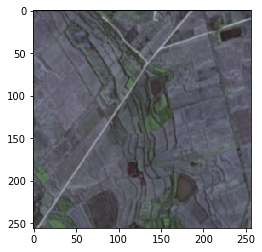

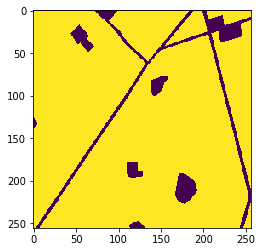

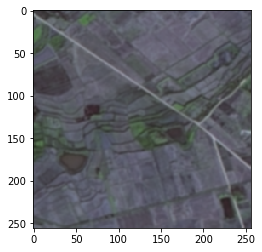

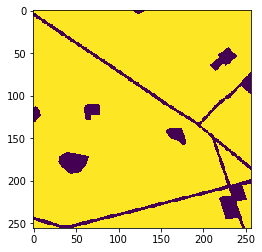

error: OpenCV(3.4.2) C:\Miniconda3\conda-bld\opencv-suite_1534379934306\work\modules\core\src\lut.cpp:368: error: (-215:Assertion failed) (lutcn == cn || lutcn == 1) && _lut.total() == 256 && _lut.isContinuous() && (depth == 0 || depth == 1) in function 'cv::LUT'


In [39]:
deal_data = data[100:356, 100:356, :]
deal_label = label_img[100:356, 100:356]
xb,yb = rotate(deal_data, deal_label, 90)
plot_res_label(xb, yb)
xb = blur(deal_data)
plot_res_label(xb, deal_label)
random_gamma_transform(deal_data, 1.0)


In [3]:
import cv2
import matplotlib.pyplot as plt
def channel_hist(image):
	'''
	画三通道图像的直方图
	'''
	color = ('b', 'g', 'r')   #这里画笔颜色的值可以为大写或小写或只写首字母或大小写混合
	for i , color in enumerate(color):
		hist = cv2.calcHist([image], [i], None, [256], [0, 256])  #计算直方图
		plt.plot(hist, color)
		plt.xlim([0, 256])
	plt.show()
def whole_hist(image):
	'''
	绘制整幅图像的直方图
	'''
	plt.hist(image.ravel(), 256, [0, 256]) #numpy的ravel函数功能是将多维数组降为一维数组
	plt.show()
# for i in range(1,9):
#     data = cv2.imread("Data"+ str(i)+".tif", 3)
#     channel_hist(data)
#     whole_hist(data)
for i in range(1,3):
    data = normalization(cv2.imread("Test"+ str(i)+".tif", 3)) 
    #plt.hist(data.ravel(), 256, [-256, 256])
    plt.show()
    channel_hist(data)
    whole_hist(data)

AttributeError: 'numpy.ndarray' object has no attribute 'sub_'

In [4]:
def normalization(img):
    mu = [87.29496233333333,92.12323833333333,92.726152]
    sigma = [5.581662158824008,5.640437366008411,6.813343995882588]
    for i in range(3):
        img[:,:,i] = ((img[:,:,i] - mu[i])/sigma[i] * + 1) * 128
    return img


SyntaxError: invalid syntax (<ipython-input-4-da70203f2a10>, line 5)

In [26]:
import cv2
import numpy as np
pics = ["Data" + str(i)+".tif" for i in range(1, 9)]
pics.append("Test1.tif")
pics.append("Test2.tif")
data = np.zeros((500,600,3))
for pic in pics:
    data += cv2.imread(pic,3)
print(np.mean(data[:,:,0])/len(pics),np.mean(data[:,:,1])/len(pics),np.mean(data[:,:,2])/len(pics))
print(np.std(data[:,:,0])/len(pics),np.std(data[:,:,1])/len(pics),np.std(data[:,:,2])/len(pics))

87.29496233333333 92.12323833333333 92.726152
5.581662158824008 5.640437366008411 6.813343995882588


In [31]:
pics = ["Data" + str(i)+".tif" for i in range(1, 9)]
mu = [87.29496233333333,92.12323833333333,92.726152]
sigma = [5.581662158824008,5.640437366008411,6.813343995882588]
import matplotlib.pyplot as plt
pics.append("Test1.tif")
pics.append("Test2.tif")
for pic in pics:
    data += cv2.imread(pic,3)
    for i in range(3):
        print(data[:,:,i])
        data[:,:,i] = (data[:,:,i] - mu[i])/sigma[i]
        print(data[:,:,i])
    #plt.figure()
    #plt.imshow(data)
#plt.show()


 -0.36540485 -0.19117168 ...  0.32390184  0.41170857
   1.21679056]]
[[ 97.75878395  82.93583535  64.47428702 ...  91.48038218  94.66496802
   97.81587779]
 [100.43687459  85.43997388  64.39824517 ...  89.13083339  98.21179014
  102.84137586]
 [ 93.23577307  86.88505484  85.7661657  ...  93.79508741 103.32000482
  107.56066299]
 ...
 [ 79.22964911  85.9847135   96.65164187 ...  87.03895324  88.33723417
   87.62244824]
 [ 77.01187511  87.37397875  95.58028358 ...  88.15281727  85.89070139
   86.35765119]
 [ 76.5538749   92.28747409  94.28529127 ...  93.86671061  88.29045707
   90.04484449]]
[[ 0.73864346 -1.43693268 -4.14654904 ... -0.18284264  0.28456159
   0.74702316]
 [ 1.13170898 -1.06939825 -4.15770976 ... -0.52768782  0.80513154
   1.48461957]
 [ 0.0747975  -0.85730255 -1.02152281 ...  0.15688851  1.55486833
   2.17727316]
 ...
 [-1.98089263 -0.98944637  0.57614732 ... -0.83471475 -0.64416501
  -0.74907472]
 [-2.30639711 -0.78554279  0.4189032  ... -0.67123203 -1.00324461
  -0.934

In [41]:
import cv2
data = cv2.cvtColor(cv2.imread("预览图/Data1.png"), cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(data,20,30)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

error: OpenCV(3.4.2) c:\miniconda3\conda-bld\opencv-suite_1534379934306\work\modules\imgproc\src\color.hpp:253: error: (-215:Assertion failed) VScn::contains(scn) && VDcn::contains(dcn) && VDepth::contains(depth) in function 'cv::CvtHelper<struct cv::Set<3,4,-1>,struct cv::Set<1,-1,-1>,struct cv::Set<0,2,5>,2>::CvtHelper'


In [3]:
path = 'C:/Users/Hannah Lee/Desktop/Competitions/MathorCup/data'

#datapiple
#使用torch创建数据管道mydataset
import os
import random

import numpy as np
import torch
from skimage.io import imread
from torch.utils.data import Dataset
from torch.utils.data import random_split
import cv2  
from torch.utils.data import DataLoader
from tqdm import tqdm


class MyDataset(Dataset):
    """Brain MRI dataset for FLAIR abnormality segmentation"""

    in_channels = 3
    out_channels = 1

    def __init__(
        self,
        images_dir,
        image_size=256,
        seed=42,
    ):
        # read images
        self.pics = []
        self.masks = []
        pic_dir = os.path.join(images_dir, "src")
        label_dir = os.path.join(images_dir, "label")
        print("------{} pics------".format(len(os.listdir(pic_dir))))
        for i in tqdm(range(1,len(os.listdir(pic_dir))+1)):
        # for i in tqdm(range(10)):
            self.pics.append( os.path.join(pic_dir, 'Data' + str(i) + '.tif')) 
            self.masks.append(os.path.join(label_dir, 'Data' + str(i) + '_reference' + '.tif'))

    def __len__(self):
        return len(self.pics)

    def __getitem__(self, idx):
        pic = cv2.imread(self.pics[idx]).transpose(2,0,1).astype(np.float32)
        mask = cv2.imread(self.masks[idx], 2)[np.newaxis, :, :].astype(np.uint8)
        return torch.from_numpy(pic), torch.from_numpy(mask)




dataset = MyDataset('dataset')
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, test_size])
train_loader = DataLoader(train_dataset, shuffle=True, num_workers=0, batch_size=128)
data_loader = DataLoader(dataset, shuffle=True, num_workers=0, batch_size=128)


for pic, mask in tqdm(data_loader):
    print(pic.shape, mask.shape)
    t = pic[0].numpy().transpose((1,2,0))
    print(t.shape)

------8 pics------
  0%|          | 0/1 [00:00<?, ?it/s]torch.Size([8, 3, 500, 600]) torch.Size([8, 1, 500, 600])
(500, 600, 3)
100%|██████████| 1/1 [00:00<00:00, 15.87it/s]


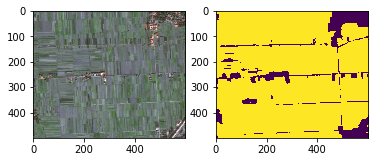

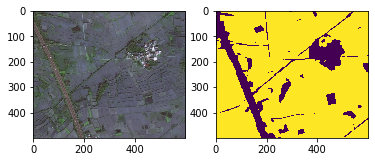

In [11]:
import cv2 
def plot_res_label(data, label_img):
    plt.subplot(121)
    plt.imshow(data)
    plt.subplot(122)
    plt.imshow(label_img)
    plt.show()
t = cv2.imread("dataset/test/Test1.tif",3)
cv2.resize(t, (512, 512))
mask = cv2.imread("dataset/label/pred-test-mask1.tif",2)
plot_res_label(t, mask)
t = cv2.imread("dataset/test/Test2.tif",3)
mask = cv2.imread("dataset/label/pred-test-mask2.tif",2)
plot_res_label(t, mask)